# Project 2

Copyright 2017 Eamon and Lydia

Git ass

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [3]:
%matplotlib inline

from modsim import *

In [39]:
t0=0
t_end=360
T_freezer=-17.8
init = State(q0=0, temp=23)

In [104]:
water = System(m=237, c=4.186, eof=333.55*237, fp=0, r=0.1)#10.47
apple = System(m=239, c=3.776, eof=333.55*239, fp=-1.69, r=0.1)
lemonade = System(m=240, c=3.861, eof=333.55*240, fp=0, r=0.1)
cranberry = System(m=249, c=3.91, eof=333.55*249, fp=0, r=0.1)

juices = [water, apple, lemonade, cranberry]

In [105]:
def run_simulation(system, state=init):
    
    unpack(system)
    T = state.temp
    
    frame = TimeFrame(columns=init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end, 1)
    heat_r = eof
    
    for t in ts:
        if frame.temp[t] >= T_freezer:
            if frame.temp[t] <= fp and heat_r >= 0:
                heat_r += r*(T_freezer-T)*(60)
                frame.q0[t+1] = frame.q0[t] + (r*(T_freezer-T)*(60))
                frame.temp[t+1] = frame.temp[t]
            else:
                delta_Q = r*(T_freezer-T)*(60)
                frame.q0[t+1] = frame.q0[t] + delta_Q
                frame.temp[t+1] = frame.temp[t] + delta_Q/m*c
        else:
            frame.temp[t+1] = frame.temp[t]
            frame.q0[t+1] = frame.q0[t]
    results = frame
    return results

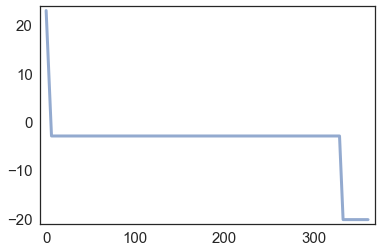

In [106]:
sim = run_simulation(water)
plot(sim.temp)

In [107]:
sim1 = run_simulation(water)
sim2 = run_simulation(apple)
sim3 = run_simulation(lemonade)
sim4 = run_simulation(cranberry)

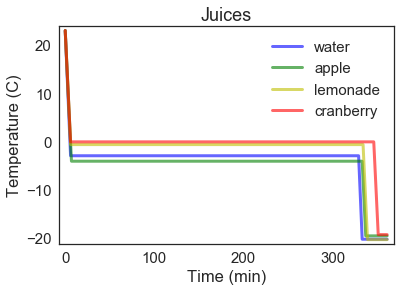

In [108]:
plot(sim1.temp, 'b', label='water')
plot(sim2.temp, 'g', label='apple')
plot(sim3.temp, 'y', label='lemonade')
plot(sim4.temp, 'r', label='cranberry')
decorate(xlabel='Time (min)', ylabel='Temperature (C)', title='Juices', legend='best')